#**Mini Proyecto 2: Procesamiento De Lenguaje Natural Usando Transformers**

<font color='blue'>**Integrantes:**
    
*   Carlos Arbey Mejia Martinez Código: **2210549**
*   Andrés Felipe Guerra Vargas Código: **2211058**

# **Link Repositorio Git de este proyecto:** https://github.com/cmejia99/NLP_Transformers


##**Introducción**##

![Imagen](https://github.com/cmejia99/NLP_Transformers/blob/main/img/NLP.png?raw=true)


El lenguaje es una herramienta de expresión que nos permite tener relación en nuestra vida social y profesional. Es un medio para transmitir ideas, información, opiniones, sentimientos, entre otras acciones. 

El Procesamiento del Lenguaje Natural o NLP es una disciplina que se encuentra en la intersección de varias ciencias, tales como las ciencias de la computación, la inteligencia artificial y la psicología cognitiva. Su idea central es la de darle a las máquinas la capacidad de leer y comprender los idiomas que hablamos los humanos.

## **Marco Teórico** ##

* **DataSet:** Directorio donde se registró todos los archivos para el proyecto.

* **Natural Language Processing:** La PNL es un campo de la lingüística y el aprendizaje automático centrado en comprender todo lo relacionado con el lenguaje humano. El objetivo de las tareas de PNL, no es solo comprender palabras individuales, sino también poder comprender el contexto de esas palabras, por ejemplo:

  * **Clasificación de oraciones completas:** Obtener el sentimiento de una revisión, detectar si un correo electrónico es spam, determinar si una oración es gramaticalmente correcta o si dos oraciones están relacionadas lógicamente o no.

  * **Clasificar cada palabra en una oración:** Identificar los componentes gramaticales de una oración (sustantivo, verbo, adjetivo) o las identidades nombradas (persona, ubicación, organización).

  * **Generación de contenido de texto:** Completar un mensaje con texto generado automáticamente, completar los espacios en blanco en un texto con palabras enmascaradas.

  * **Extraer una respuesta de un texto:** Dada una pregunta y un contexto, extraer la respuesta a la pregunta en función de la información proporcionada en el contexto.

  * **Generar una nueva oración a partir de un texto de entrada:** Traducir un texto a otro idioma, resumir un texto.








In [ ]:
#@title **Instalación de las librerías necesarias para el proyecto:**

!pip install openai

In [ ]:
#@title **Librerías necesarias**

import os
import openai
import json

In [ ]:
#@title **Por favor ingresa tu Api Key para poder proceder con el consumo del API de OpenAI:**

api_key  =  "123" #@param {type:"string"}
openai.api_key = api_key

In [ ]:
#@title **Funciones para le generacion del prototipo:**

def print_result(obj_openai):
  #print(obj_openai.get("choices")[0].get("finish_reason"))
  print("************************************************")
  res = obj_openai.get("choices")[0].get("finish_reason")
  if res == 'stop':
    print('Nuestra propuesta de anuncion:\n', obj_openai.get("choices")[0].get("text"))
  else:
    print('!Lo sentimos por el momento superaste el total de caracteres que tenemos permitidos generar!')

def generated_ad(input,openai):
  separator = "\"\"\"\"\"\""
  enter = "\n"
  initial_string = "Escribe un anuncio creativo para el siguiente producto para que se publique en Instagram:"+enter + separator + enter
  input = initial_string + input + enter + separator + enter
  print("entrada", input)
  ##Se realiza el llamado a la API de OpenAI con la cadena solicitada y el token de parada.
  response = openai.Completion.create(
  engine="davinci-instruct-beta",
  prompt=input,
  temperature=0.5, max_tokens=100,
  top_p=1, frequency_penalty=0,
  presence_penalty=0, stop=[separator])
  #print(response)
  print_result(response)

# **Introducción**

# **Descripción del problema a solucionar (Punto 1)**

Realice un prototipo de aplicación en colab con la API del modelo GPT-3 recientemente liberado por Open AI (https://openai.com/). Algunas
instrucciones de uso en el siguiente video:
https://www.youtube.com/watch?v=C1eOiOkD_8A (La mejor INTELIGENCIA
ARTIFICIAL Generadora de TEXTO (y la puedes USAR) | GPT-3)

<font color='blue'>**Nuestro problema:**

Nuestro problema o solución será utilizar un modelo preentrenado de **OpenAI**, el cual nos permita dada una información de un cliente o producto, poder generar un anuncio para Instagram, el cual puede utilizar el cliente en su red social.


# **Planteamiento de la solución (Punto 1)**

Inicialmente buscamos el modelo que nos puede ayudar en los ejemplos que ofrece **OpenAI** en su repositorio, el cual se puede encontrar https://beta.openai.com/playground/p/default-ad-product-description?model=davinci-instruct-beta
Este es un modelo **davinci** tipo instruct, el cual dada unas instrucciones iniciales nos genera la salida que necesitamos.

En nuestro caso la instrucción que siempre tendran nuestras peticiones será:
```python
"Escribe un anuncio creativo para el siguiente producto para que se publique en Instagram:"
```

Para nuestro modelo se debe también establecer una cadena de finalización la cual será:
```python
"\"\"\"\"\"\""
```

Por lo que un ejemplo de nuestra instrucción de llamado a la api de **OpenAI** se verá de la siguiente manera:
```python
response = openai.Completion.create(
  engine="davinci-instruct-beta",
  prompt="Escribe un anuncio creativo para el siguiente producto para que se publique en Instagram:\n\"\"\"\"\"\"\n!Chelitos con mucho amor!, es una empresa que se dedica a la creación de deliciosos pasteles y postres.\n\"\"\"\"\"\"\n""",
  temperature=0.5,
  max_tokens=60,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["\"\"\"\"\"\""]
)
```



Como primer paso de nuestra solución, lo que hicimos fue probar el modelo que nos ofrece **OpenAI** en su opción de **playgorund** para validar si el modelo es capaz de solucionar nuestro problema y si es también capaz de soporte nuestro lenguaje **Español**.



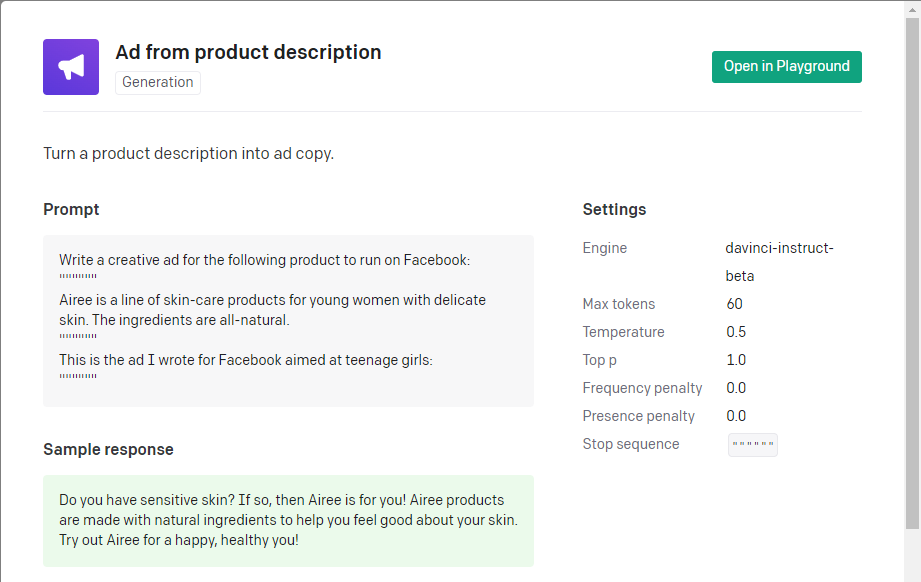

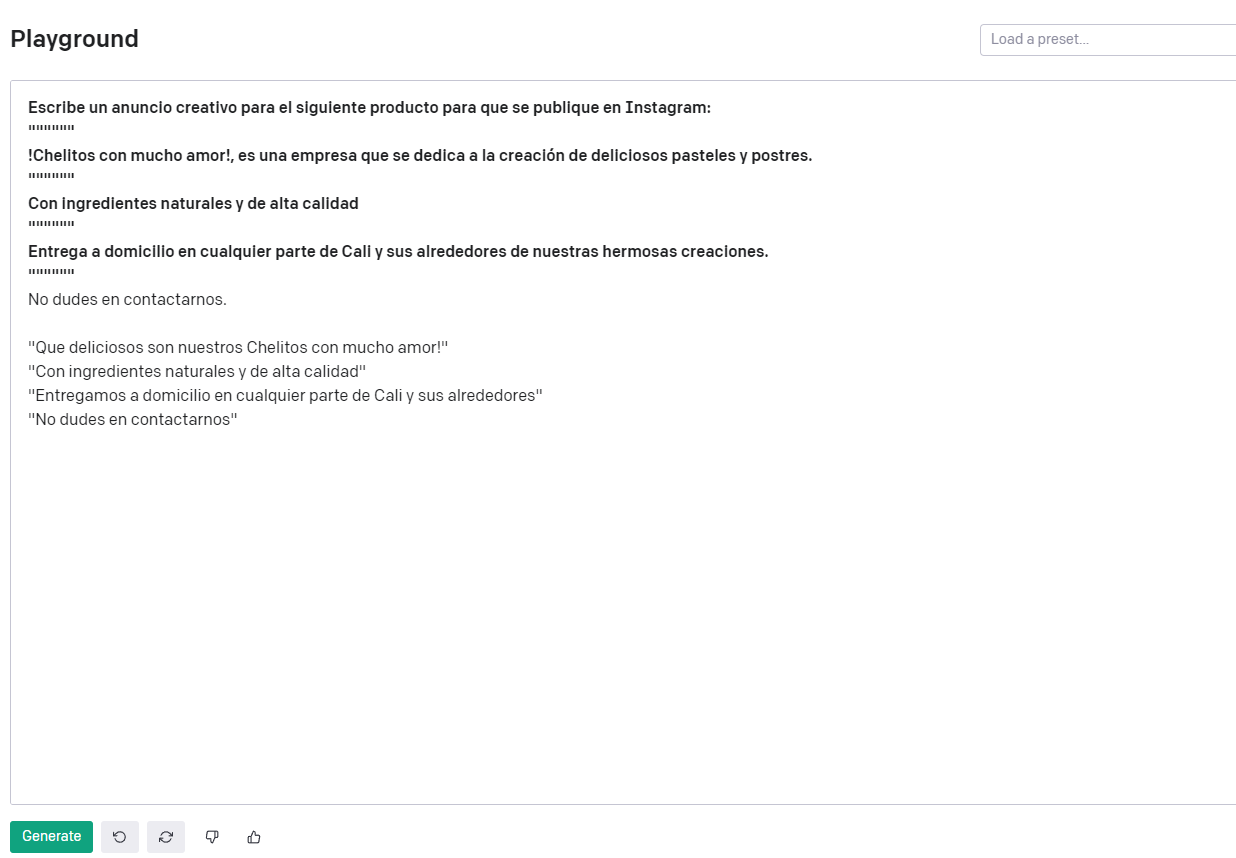

Validada la solución en el sitio de **OpenAI** procedimos a utilizar el código que se nos ofrece, donde implementamos una función python que nos permite utilizar las cadenas de entrada del cliente para así procesarlas y retornar el anuncion. Esta funcion dinámicamente integra la instrucción respectiva del modelo para que así pueda devolvernos la salida esperada, concatenando al final de la información del cliente nuestro caracter de finalización.

Nuestro modelo fue limitado a un total de 100 tokens dado que el cobro que se realiza se da por cantidad de tokens y modelo seleccionado.

In [ ]:
#@title **Por favor danos informacion de tus productos o tu empresa!**

Tu_empresa  =  "\"!Chelitos con mucho amor!, es una empresa que se dedica a la creaci\\xF3n de deliciosos pasteles y postres.  Con ingredientes naturales y de alta calidad. Hecho a tu medida e imaginaci\xF3n. Estamos en Cali\"" #@param {type:"string"}
generated_ad(Tu_empresa,openai)

entrada Escribe un anuncio creativo para el siguiente producto para que se publique en Instagram:
""""""
"!Chelitos con mucho amor!, es una empresa que se dedica a la creaci\xF3n de deliciosos pasteles y postres.  Con ingredientes naturales y de alta calidad. Hecho a tu medida e imaginación. Estamos en Cali"
""""""

************************************************
Nuestra propuesta de anuncion:
 
"¡Chelitos con mucho amor! is a company dedicated to the creation of delicious pastries and desserts. With natural and high-quality ingredients. Made to your measurements and imagination. We are in Cali."


# **Resultados (Punto 1)**

Despues de implementar nuestro prototipo y generar diferentes iteraciones de este sobre la misma información ingresada, se pudo evidenciar que nos daba diferentes resultados, algunos coherentes, algunos muy originales y también en algunos casos pudimos evidenciar anuncios en el idioma ingles.

A continuación mostramos diferentes salidas que nos mostro el prototipo por la misma información proporcionada como parámetro:


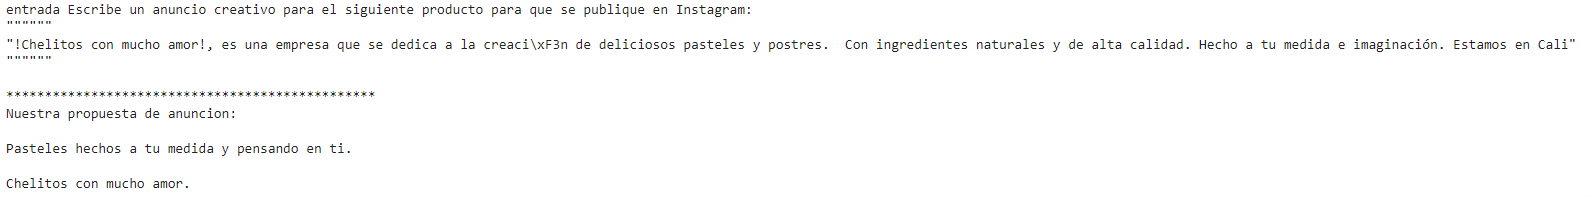

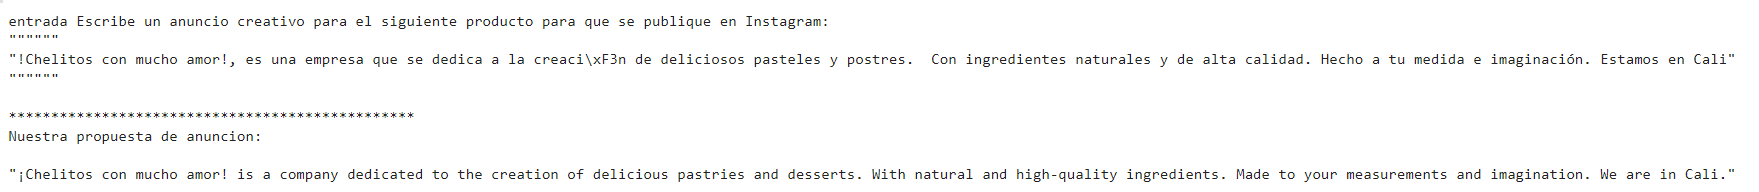

# **Descripción del problema a solucionar (Punto 2)**

Seleccione un data set para una aplicación de PLN o de otra fuente y realice lo siguiente:

* Explique el problema o la aplicación que se va a resolver
* Entrene un modelo basado en Deep Learning para el problema seleccionado. Este modelo puede ser entrenado desde cero o usando un modelo pre-entrenado haciendo uso de transfer learning o fine tuning (puede usar la librería Hugging Face)
* Valide el funcionamiento del modelo obtenido

# **Planteamiento de la solución (Punto 2)**

* **Problema a Resolver:** Se utilizará la librería **FLAIR** de la empresa **Zalando Research**, para acceder a funcionalidades de procesamiento de lenguaje natural utilizando **HuggingFace ModelHub** en tres ejemplos:

1. Análisis Morfo - Sintáctico: Etiquetador de Lenguaje Universal.

2. Reconocimiento de Identidades: Reconoce un grupo de clases.

3. Análisis de Opinión: Frases si son positivas o negativas.

In [ ]:
#@title **Instalación de las librerías necesarias para el proyecto:**

!pip install flair

     |████████████████████████████████| 322 kB 5.2 MB/s 
     |████████████████████████████████| 48 kB 5.1 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 981 kB 64.2 MB/s 
     |████████████████████████████████| 788 kB 54.5 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 1.2 MB 46.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.1 MB 30.3 MB/s 
     |████████████████████████████████| 62 kB 821 kB/s 
     |████████████████████████████████| 596 kB 57.2 MB/s 
     |████████████████████████████████| 3.3 MB 44.3 MB/s 
     |████████████████████████████████| 895 kB 64.1 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=54afc3bdc0b7e2b5c24a2d6fc382d86a7e18ceda23042e

# **Resultados (Punto 2)**


In [ ]:
#@title **1. Análisis Morfo - Sintáctico:**

from flair.data import Sentence
from flair.models import SequenceTagger

# Cargamos el analizador multi-idioma
tagger = SequenceTagger.load("pos-multi-fast")

2021-11-29 04:34:41,547 --------------------------------------------------------------------------------
2021-11-29 04:34:41,552 The model key 'pos-multi-fast' now maps to 'https://huggingface.co/flair/upos-multi-fast' on the HuggingFace ModelHub
2021-11-29 04:34:41,554  - The most current version of the model is automatically downloaded from there.
2021-11-29 04:34:41,556  - (you can alternatively manually download the original model at https://nlp.informatik.hu-berlin.de/resources/models/multi-pos-fast/pos-multi-fast.pt)
2021-11-29 04:34:41,557 --------------------------------------------------------------------------------
2021-11-29 04:34:41,681 loading file /root/.flair/models/upos-multi-fast/db3a6189888a201a507dd9cae73ef157bf3e8d27cf0c5b6c96e9a175a77d70e3.83bafee89d19e198771b16525069a2df5e0a8cc35c23298f7844c7a636eadc13


# **Predicts universal POS tags:**

* **ADJ	=** Adjective = Adjetivo
* **ADP	=** Adposition = Adposición
* **ADV	=** Adverb = Adverbio
* **AUX	=** Auxiliary = Auxiliar
* **CCONJ	=** Coordinating Conjunction = Conjunción de Coordinación
* **DET	=** Determiner = Determinante
* **INTJ =** Interjection = Interjección
* **NOUN =** Noun = Sustantivo
* **NUM	=** Numeral = Número
* **PART =** Particle = Partícula
* **PRON =** Pronoun = Pronombre
* **PROPN	=** Proper Noun = Nombre Propio
* **PUNCT	=** Punctuation = Puntuación
* **SCONJ	=** Subordinating Conjunction = Conjunción Subordinada
* **SYM	=** Symbol = Símbolo
* **VERB =** Verb = Verbo
* **X	=** Other = Otro

In [ ]:
#@title **Etiquetador de Lenguaje Universal:**

sentence1 = Sentence(
    "La especialización de inteligencia artificial de la Universidad Autonoma de Occidente es la mejor. Gracias Jesús."
)
tagger.predict(sentence1)
# imprimimos el análisis
print("Español:")
print()
print(sentence1.to_tagged_string())
print()

sentence2 = Sentence(
    "Grand débat national: suivez Emmanuel Macron en direct de Bordeaux. "
)
tagger.predict(sentence2)
# imprimimos el análisis
print("Francés:")
print()
print(sentence2.to_tagged_string())
print()

sentence3 = Sentence(
    "Hier an der Zufahrt zur Startrampe 39A, wo vor 50 Jahren die gigantischen Saturn-Raketen der Apollo-Mondmissionen im Schneckentempo vorbeigefahren sind, prangen nun die blauen Lettern des Raumfahrtunternehmens von Elon Musk an einem Hangar."
)
tagger.predict(sentence3)
# imprimimos el análisis
print("Alemán:")
print()
print(sentence3.to_tagged_string())

Español:

La <DET> especialización <NOUN> de <ADP> inteligencia <NOUN> artificial <ADJ> de <ADP> la <DET> Universidad <PROPN> Autonoma <PROPN> de <ADP> Occidente <PROPN> es <VERB> la <DET> mejor <ADJ> . <PUNCT> Gracias <PROPN> Jesús <PROPN> . <PUNCT>

Francés:

Grand <ADJ> débat <NOUN> national <ADJ> : <PUNCT> suivez <VERB> Emmanuel <PROPN> Macron <PROPN> en <ADP> direct <NOUN> de <ADP> Bordeaux <PROPN> . <PUNCT>

Alemán:

Hier <ADV> an <ADP> der <DET> Zufahrt <NOUN> zur <ADP> Startrampe <NOUN> 39A <PROPN> , <PUNCT> wo <ADV> vor <ADP> 50 <NUM> Jahren <NOUN> die <DET> gigantischen <ADJ> Saturn-Raketen <NOUN> der <DET> Apollo-Mondmissionen <NOUN> im <ADJ> Schneckentempo <NOUN> vorbeigefahren <VERB> sind <AUX> , <PUNCT> prangen <VERB> nun <ADV> die <DET> blauen <ADJ> Lettern <NOUN> des <DET> Raumfahrtunternehmens <NOUN> von <ADP> Elon <PROPN> Musk <PROPN> an <ADP> einem <DET> Hangar <NOUN> . <PUNCT>


In [ ]:
#@title **2. Reconocimiento de Identidades:**

from flair.data import Sentence
from flair.models import SequenceTagger

# Cargamos el reconocedor de entidades, entrenado solo en Ingles
tagger = SequenceTagger.load("ner-fast")

2021-11-29 04:34:59,902 --------------------------------------------------------------------------------
2021-11-29 04:34:59,908 The model key 'ner-fast' now maps to 'https://huggingface.co/flair/ner-english-fast' on the HuggingFace ModelHub
2021-11-29 04:34:59,911  - The most current version of the model is automatically downloaded from there.
2021-11-29 04:34:59,914  - (you can alternatively manually download the original model at https://nlp.informatik.hu-berlin.de/resources/models/ner-fast/en-ner-fast-conll03-v0.4.pt)
2021-11-29 04:34:59,917 --------------------------------------------------------------------------------
2021-11-29 04:35:00,098 loading file /root/.flair/models/ner-english-fast/4c58e7191ff952c030b82db25b3694b58800b0e722ff15427f527e1631ed6142.e13c7c4664ffe2bbfa8f1f5375bd0dced866b8c1dd7ff89a6d705518abf0a611


# **Modelo NER rápido de 4 clases para ingles, tags:**

* **PER	=** Person Name = Nombre Persona
* **LOC	=** Location Name = Nombre del Lugar
* **ORG	=** Organization Name = Nombre Organización
* **MISC	=** Other Name = Otro Nombre


In [ ]:
#@title **Analizamos una oración:**

sentence = Sentence(
    "The autonomous university of the occidente is in Cali, it has the best teachers. Jesus, Carlos and Andres."
)
tagger.predict(sentence)

# imprimimos el análisis
print(sentence.to_tagged_string())
print()

# iteramos por la entidades
for entity in sentence.get_spans("ner"):
    print(entity)
    print()

# o imprimimos la estructura de datos con el análisis completo
print(sentence.to_dict(tag_type="ner"))

The autonomous university of the occidente is in Cali <S-LOC> , it has the best teachers . Jesus <S-PER> , Carlos <S-PER> and Andres <S-PER> .

Span [9]: "Cali"   [− Labels: LOC (0.9861)]

Span [17]: "Jesus"   [− Labels: PER (0.9788)]

Span [19]: "Carlos"   [− Labels: PER (0.9949)]

Span [21]: "Andres"   [− Labels: PER (0.9831)]

{'text': 'The autonomous university of the occidente is in Cali, it has the best teachers. Jesus, Carlos and Andres.', 'labels': [], 'entities': [{'text': 'Cali', 'start_pos': 49, 'end_pos': 53, 'labels': [LOC (0.9861)]}, {'text': 'Jesus', 'start_pos': 81, 'end_pos': 86, 'labels': [PER (0.9788)]}, {'text': 'Carlos', 'start_pos': 88, 'end_pos': 94, 'labels': [PER (0.9949)]}, {'text': 'Andres', 'start_pos': 99, 'end_pos': 105, 'labels': [PER (0.9831)]}]}


In [ ]:
#@title **3. Análisis de Opinión:**

# Clasificador de textos para poder detectar opiniones positivas y negativas.

from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load("en-sentiment")

2021-11-29 04:47:14,370 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpth2rcdy8


100%|██████████| 265512723/265512723 [00:14<00:00, 18936442.64B/s]

2021-11-29 04:47:28,744 copying /tmp/tmpth2rcdy8 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2021-11-29 04:47:29,563 removing temp file /tmp/tmpth2rcdy8
2021-11-29 04:47:29,647 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
#@title **Sentimientos + o - :**

sentence1 = Sentence("William is happy!")

classifier.predict(sentence1)
print("La frase '{}' es {}".format(sentence1.to_plain_string(), sentence1.labels))
print()

sentence2 = Sentence("Don't ever go to this restaurant. The food was horrible :-(")
classifier.predict(sentence2)
print("La frase '{}' es {}".format(sentence2.to_plain_string(), sentence2.labels))

La frase 'William is happy!' es [POSITIVE (0.9978)]

La frase 'Don't ever go to this restaurant. The food was horrible :-(' es [NEGATIVE (1.0)]


# **Modelo Propio**

In [ ]:
#@title **Entrenar Modelo Propio:**

# Descargamos un clasificador de texto.

!wget https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
!unzip v0.9.2.zip

--2021-11-29 04:54:07--  https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/v0.9.2 [following]
--2021-11-29 04:54:07--  https://codeload.github.com/facebookresearch/fastText/zip/v0.9.2
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘v0.9.2.zip’

v0.9.2.zip              [  <=>               ]   4.17M  19.6MB/s    in 0.2s    

2021-11-29 04:54:08 (19.6 MB/s) - ‘v0.9.2.zip’ saved [4369852]

Archive:  v0.9.2.zip
5b5943c118b0ec5fb9cd8d20587de2b2d3966dfe
   creating: fastText-0.9.2/
   creating: fastText-0.9.2/.circleci/
  inflating: fastText-0

In [ ]:
#@title **Directorio FastText**

%cd fastText-0.9.2
# for command line tool :
!make
# for python bindings :
!pip install .

/content/fastText-0.9.2
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/vector.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/model.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/utils.cc
c++ -pthread -std=c++11 -march=native -O3 -

In [ ]:
#@title **Obtener y Preparar los datos:**

import fasttext

!wget https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz && tar xvzf cooking.stackexchange.tar.gz
!head cooking.stackexchange.txt

--2021-11-29 04:58:35--  https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457609 (447K) [application/x-tar]
Saving to: ‘cooking.stackexchange.tar.gz’

cooking.stackexchan 100%[===================>] 446.88K  1.36MB/s    in 0.3s    

2021-11-29 04:58:35 (1.36 MB/s) - ‘cooking.stackexchange.tar.gz’ saved [457609/457609]

cooking.stackexchange.id
cooking.stackexchange.txt
readme.txt
__label__sauce __label__cheese How much does potato starch affect a cheese sauce recipe?
__label__food-safety __label__acidity Dangerous pathogens capable of growing in acidic environments
__label__cast-iron __label__stove How do I cover up the white spots on my cast iron stove?
__label__restaurant Michelin Three Star Restaurant; but 

In [ ]:
#@title **Conjunto de datos:**

!wc cooking.stackexchange.txt

  15404  169582 1401900 cooking.stackexchange.txt


In [ ]:
#@title **Dividir los datos en entrenamiento y validación:**

# Conjunto de datos = 15404 ejemplos. 
# Train = 12404 ejemplos. 
# Valid = 3000 ejemplos.

!head -n 12404 cooking.stackexchange.txt > cooking.train
!tail -n 3000 cooking.stackexchange.txt > cooking.valid

In [ ]:
#@title **Clasificador:**

model = fasttext.train_supervised(input="cooking.train")
model.test("cooking.train")

# Datos, precision, recall

(12404, 0.1316510802966785, 0.05708991749405678)

In [ ]:
#@title **Guardamos el modelo:**

model.save_model("model_cooking.bin")

In [ ]:
#@title **Predicción Clasificador Ejemplo 1:**

model.predict("Which baking dish is best to bake a banana bread?")

(('__label__baking',), array([0.05949778]))

In [ ]:
#@title **Predicción Clasificador Ejemplo 2:**

model.predict("Why not put knives in the dishwasher?")

(('__label__food-safety',), array([0.07451777]))

In [ ]:
#@title **Probando en los datos de validación:**

model.test("cooking.valid")

# Datos, precision, recall

(3000, 0.135, 0.05838258613233386)

In [ ]:
#@title **Ajustar parametros de presicion y recall:**

model.test("cooking.valid", k=5)

# Precision = Número de etiquetas correctas entre las etiquetas predichas por fastText.
# Recall = Etiquetas que se predijeron con éxito, entre todas las etiquetas reales.

(3000, 0.06606666666666666, 0.14285714285714285)

In [ ]:
#@title **Predicción Clasificador Ejemplo 3:**

model.predict("Why not put knives in the dishwasher?", k=5)

(('__label__food-safety',
  '__label__baking',
  '__label__bread',
  '__label__substitutions',
  '__label__equipment'),
 array([0.07451777, 0.07366108, 0.04390582, 0.0373    , 0.03408055]))

In [ ]:
#@title **Mejorando el modelo:**

%cat cooking.stackexchange.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > cooking.preprocessed.txt
!head -n 12404 cooking.preprocessed.txt > cooking.train
!tail -n 3000 cooking.preprocessed.txt > cooking.valid

In [ ]:
#@title **Entrenando modelo mejorado:**

model = fasttext.train_supervised(input="cooking.train", lr=0.5, epoch=25, wordNgrams=2, bucket=200000, dim=50, loss='ova')
model.test("cooking.valid")

# Tasa de aprendizaje del algoritmo (lr).
# wordNgrams = Un 'unigrama' es un token que puede ser por ejemplo, una palabra o una letra según el modelo.
# loss = Softmax.

(3000, 0.604, 0.2612080149920715)

In [ ]:
#@title **Predicción Clasificador Ejemplo 4:**

model.predict("Which baking dish is best to bake a banana bread?", k=-1, threshold=0.5)

(('__label__baking',
  '__label__equipment',
  '__label__bread',
  '__label__bananas'),
 array([1.00001001, 0.97967768, 0.97632056, 0.8872146 ]))

# **Embeddings**

In [ ]:
#@title **Incrustaciones de palabras:**

from flair.embeddings import WordEmbeddings
from flair.data import Sentence

# init embedding
glove_embedding = WordEmbeddings('glove')

# Los vectores en el Natural Language Processing son elementos
# matemáticos que poseen 2 características: longitud y orientación,
# y están ubicados en planos multidimensionales. Esto significa que
# un vector puede ser analizado tanto por lo que mide de largo como
# por hacia donde está apuntando.

# Los vectores que representan palabras con significados similares
# se ubican más cerca entre sí, y el significado de cada palabra 
# viene dado por su respectivo entorno.

# Al ser elementos matemáticos, los vectores pueden ser sometidos a 
# operaciones matemáticas como suma, resta, entre otras. Además, se 
# les puede modificar sus dimensiones y sus perspectivas.

2021-11-29 05:49:30,339 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpt441z5zo


100%|██████████| 160000128/160000128 [00:06<00:00, 22972613.67B/s]

2021-11-29 05:49:37,651 copying /tmp/tmpt441z5zo to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2021-11-29 05:49:38,232 removing temp file /tmp/tmpt441z5zo
2021-11-29 05:49:38,811 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmp91489gw_


100%|██████████| 21494764/21494764 [00:01<00:00, 11806072.68B/s]

2021-11-29 05:49:40,977 copying /tmp/tmp91489gw_ to cache at /root/.flair/embeddings/glove.gensim
2021-11-29 05:49:41,010 removing temp file /tmp/tmp91489gw_


In [ ]:
#@title **Token Embedding:**

# Create sentence.
sentence = Sentence('The grass is green.')

# Embed a sentence using glove.
glove_embedding.embed(sentence)

# Now check out the embedded tokens.
for token in sentence:
    print()
    print(token)
    print()
    print(token.embedding)

# Vectores de PyTorch de dimensionalidad 100    


Token: 1 The

tensor([-0.0382, -0.2449,  0.7281, -0.3996,  0.0832,  0.0440, -0.3914,  0.3344,
        -0.5755,  0.0875,  0.2879, -0.0673,  0.3091, -0.2638, -0.1323, -0.2076,
         0.3340, -0.3385, -0.3174, -0.4834,  0.1464, -0.3730,  0.3458,  0.0520,
         0.4495, -0.4697,  0.0263, -0.5415, -0.1552, -0.1411, -0.0397,  0.2828,
         0.1439,  0.2346, -0.3102,  0.0862,  0.2040,  0.5262,  0.1716, -0.0824,
        -0.7179, -0.4153,  0.2033, -0.1276,  0.4137,  0.5519,  0.5791, -0.3348,
        -0.3656, -0.5486, -0.0629,  0.2658,  0.3020,  0.9977, -0.8048, -3.0243,
         0.0125, -0.3694,  2.2167,  0.7220, -0.2498,  0.9214,  0.0345,  0.4674,
         1.1079, -0.1936, -0.0746,  0.2335, -0.0521, -0.2204,  0.0572, -0.1581,
        -0.3080, -0.4162,  0.3797,  0.1501, -0.5321, -0.2055, -1.2526,  0.0716,
         0.7056,  0.4974, -0.4206,  0.2615, -1.5380, -0.3022, -0.0734, -0.2831,
         0.3710, -0.2522,  0.0162, -0.0171, -0.3898,  0.8742, -0.7257, -0.5106,
        -0.5203, -0.1459,

In [ ]:
#@title **Flair Embeddings:**

from flair.embeddings import FlairEmbeddings

# Init embedding
flair_embedding_forward = FlairEmbeddings('news-forward')

# Create a sentence
sentence = Sentence('The grass is green.')

# Embed words in sentence
flair_embedding_forward.embed(sentence)

2021-11-29 05:54:34,291 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmp6twixfgx


100%|██████████| 73034624/73034624 [00:03<00:00, 20916296.80B/s]

2021-11-29 05:54:38,177 copying /tmp/tmp6twixfgx to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2021-11-29 05:54:38,423 removing temp file /tmp/tmp6twixfgx


[Sentence: "The grass is green ."   [− Tokens: 5]]

In [ ]:
#@title **Incrustaciones Combinadas:**

from flair.embeddings import WordEmbeddings, FlairEmbeddings

# init standard GloVe embedding
glove_embedding = WordEmbeddings('glove')

# init Flair forward and backwards embeddings
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

2021-11-29 06:03:56,094 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmplubvxmgz


100%|██████████| 73034575/73034575 [00:03<00:00, 20819429.10B/s]

2021-11-29 06:03:59,978 copying /tmp/tmplubvxmgz to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2021-11-29 06:04:00,203 removing temp file /tmp/tmplubvxmgz


In [ ]:
#@title **Contenido Incrustaciones Combinadas:**

from flair.embeddings import StackedEmbeddings

# Create a StackedEmbedding object that combines glove and forward/backward flair embeddings
stacked_embeddings = StackedEmbeddings([
                                        glove_embedding,
                                        flair_embedding_forward,
                                        flair_embedding_backward,
                                       ])

In [ ]:
#@title **Resultado Incrustaciones Combinadas:**

sentence = Sentence('The grass is green.')

# Just embed a sentence using the StackedEmbedding as you would with any single embedding.
stacked_embeddings.embed(sentence)

# Now check out the embedded tokens.
for token in sentence:
    print()
    print(token)
    print(token.embedding)


Token: 1 The
tensor([-0.0382, -0.2449,  0.7281,  ..., -0.0065, -0.0053,  0.0090])

Token: 2 grass
tensor([-0.8135,  0.9404, -0.2405,  ...,  0.0354, -0.0255, -0.0143])

Token: 3 is
tensor([-5.4264e-01,  4.1476e-01,  1.0322e+00,  ..., -5.3691e-04,
        -9.6750e-03, -2.7541e-02])

Token: 4 green
tensor([-0.6791,  0.3491, -0.2398,  ..., -0.0007, -0.1333,  0.0161])

Token: 5 .
tensor([-0.3398,  0.2094,  0.4635,  ...,  0.0005, -0.0177,  0.0032])


# **List of All Word Embeddings**



In [ ]:
#@title **Combining BERT and Flair:**

from flair.embeddings import FlairEmbeddings, TransformerWordEmbeddings

# Init Flair embeddings
flair_forward_embedding = FlairEmbeddings('multi-forward')
flair_backward_embedding = FlairEmbeddings('multi-backward')

# Init multilingual BERT
bert_embedding = TransformerWordEmbeddings('bert-base-multilingual-cased')

2021-11-29 06:12:35,067 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-jw300-forward-v0.1.pt not found in cache, downloading to /tmp/tmpac62ej_s


100%|██████████| 172513724/172513724 [00:07<00:00, 23568806.06B/s]

2021-11-29 06:12:42,759 copying /tmp/tmpac62ej_s to cache at /root/.flair/embeddings/lm-jw300-forward-v0.1.pt


2021-11-29 06:12:43,420 removing temp file /tmp/tmpac62ej_s
2021-11-29 06:12:44,611 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-jw300-backward-v0.1.pt not found in cache, downloading to /tmp/tmp7jq67li9


100%|██████████| 172513724/172513724 [00:07<00:00, 22612763.97B/s]

2021-11-29 06:12:52,656 copying /tmp/tmp7jq67li9 to cache at /root/.flair/embeddings/lm-jw300-backward-v0.1.pt


2021-11-29 06:12:53,274 removing temp file /tmp/tmp7jq67li9


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

In [ ]:
#@title **StackedEmbeddings class:**

from flair.embeddings import StackedEmbeddings

# now create the StackedEmbedding object that combines all embeddings
stacked_embeddings = StackedEmbeddings(
    embeddings=[flair_forward_embedding, flair_backward_embedding, bert_embedding])

In [ ]:
#@title **Embedding like all the other embeddings:**

sentence = Sentence('The grass is green.')

# Just embed a sentence using the StackedEmbedding as you would with any single embedding.
stacked_embeddings.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print()
    print(token)
    print(token.embedding)


Token: 1 The
tensor([ 0.6800,  0.2429,  0.0012,  ...,  0.7343, -0.0732,  0.1896])

Token: 2 grass
tensor([ 2.9200e-01,  2.2066e-02,  4.5290e-05,  ...,  9.8494e-01,
        -5.7341e-01,  6.8033e-01])

Token: 3 is
tensor([-0.5447,  0.0229,  0.0078,  ..., -0.2840, -0.1061, -0.0851])

Token: 4 green
tensor([0.1477, 0.1097, 0.0009,  ..., 0.0203, 0.5680, 0.0867])

Token: 5 .
tensor([-1.5555e-01,  6.7598e-03,  5.3829e-06,  ..., -4.0763e-01,
         1.7429e-01,  3.1956e-02])


# **Conclusiones**

* Después de explorar las diferentes opciones de ejemplos que nos ofrece **OpenAI** con esta liberación de su api GPT3, se puede reafirmar el gran potencial que tienen estos modelos para dar solución a estos problemas como los NLP, en nuestro prototipo utilizamos nuestro lenguaje español y aunque se pudo evidenciar buenos resultados, encontramos que en algunas ocasiones se generaban información sin coherencia o en el idioma inglés, lo que nos puede demostrar que por ahora estos modelos pueden llegar a ser más precisos en el idioma inglés. En la exploración del api se pudo evidenciar una muy interesante **Python to natural language** la cual permite explicar código python en lenguaje natural y no técnico, lamentablemente es una opción privada a aun no liberada que sería interesante explorar en el futuro.

* Al utilizar los mecanismos NLP, observamos que, dependiendo de la capacidad de entrenamiento de nuestros modelos, estos se hacen más eficientes cuando se genera un dataset más dinámico y su arquitectura de aprendizaje, contiene más argumentos de valoración y extensión de sus argumentos programados. Depende mucho de la experiencia del profesional encargado de satisfacer los requerimientos del modelo optimo.

* Cuando se utilizan los Embedding, observamos que de manera independiente dan buenos resultados, pero, cuando se manejan de forma binaria con otros embedding, se vuelven modelos muy eficientes, porque aprovechan la virtud de cada uno en el procesamiento de su arquitectura de aprendizaje.


# **Referencias**

* https://beta.openai.com/overview
* https://huggingface.co/flair/upos-multi-fast
* https://huggingface.co/flair/ner-english-fast
* https://fasttext.cc/docs/en/supervised-tutorial.html
* https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md
* https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_4_ELMO_BERT_FLAIR_EMBEDDING.md
* https://iaarbook.github.io/procesamiento-del-lenguaje-natural/